In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"Diwali_Sales_Data.csv",encoding = ('ISO-8859-1'), low_memory = False)

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(["Status", 'unnamed1'], axis =1, inplace = True)

In [7]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace= True)

In [9]:
df.shape

(11239, 13)

In [10]:
df["Amount"].dtype

dtype('float64')

In [11]:
df["Amount"]=df["Amount"].astype("int")

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
df[["Age", "Orders", "Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

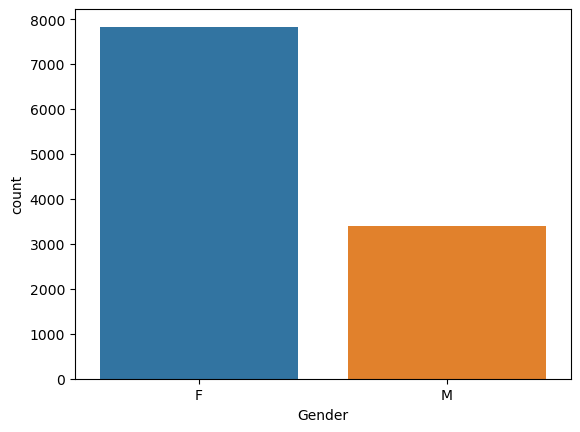

In [15]:
sns.countplot(x = "Gender", data = df)

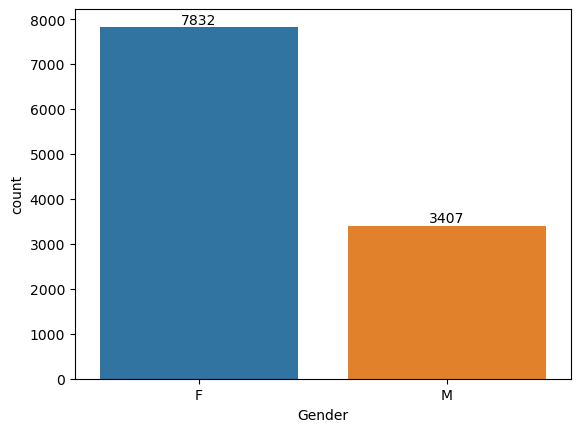

In [16]:
ax = sns.countplot(data = df , x= "Gender")
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
df.groupby(["Gender"], as_index= False, )["Amount"].sum().sort_values(by ="Amount", ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


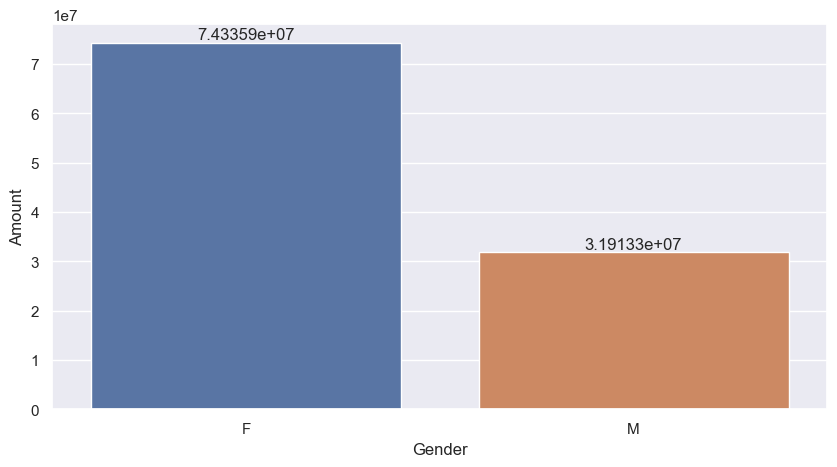

In [18]:
sales_gen =df.groupby(["Gender"], as_index= False, )["Amount"].sum().sort_values(by ="Amount", ascending = False)

sns.set(rc= {"figure.figsize": (10,5)})
ax =sns.barplot(x = "Gender", y = "Amount", data = sales_gen)
for bars in ax.containers:
    ax.bar_label(bars)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

# age

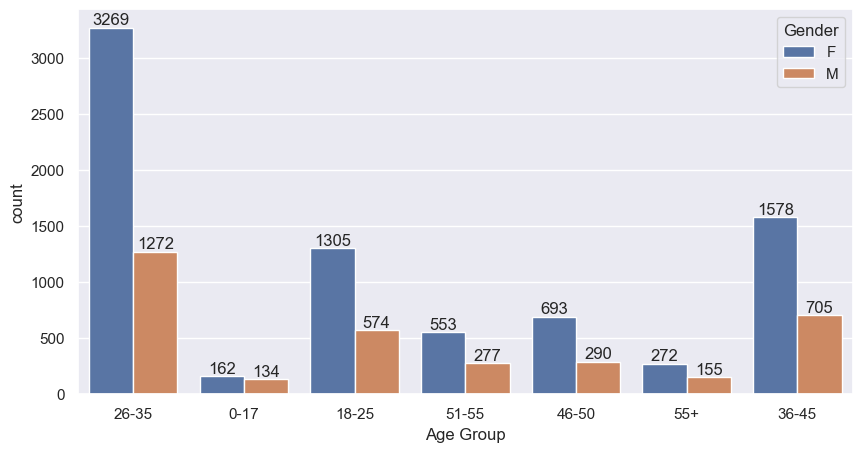

In [19]:
ax = sns.countplot(data = df, x= "Age Group", hue = "Gender")

for bars in ax.containers:
    ax.bar_label(bars)

In [20]:
#Total amount vs Age Group
sales_age = df.groupby(["Age Group"], as_index= False)["Amount"].sum().sort_values(by= "Amount", ascending = False)
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

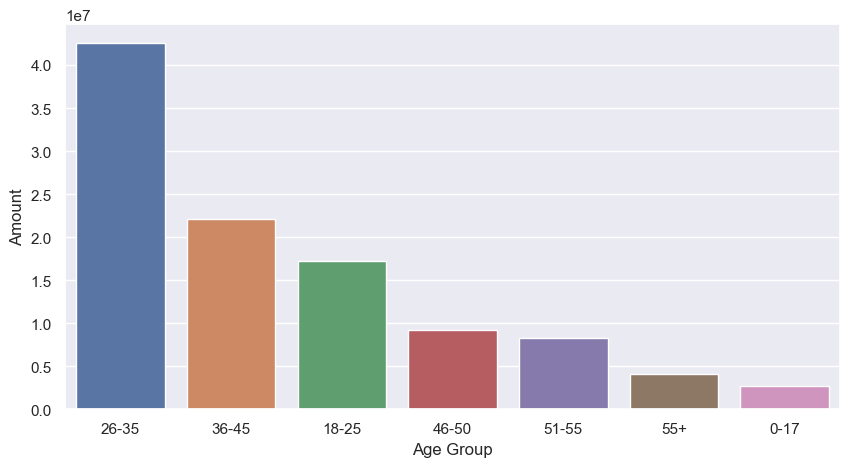

In [21]:
sns.barplot(x= "Age Group", y = "Amount", data = sales_age)

from above graphs we can csee that most of the buyers are of age group between 26-35 yrs females

# States

In [22]:
# total number of orders from top 10 states
sales_state= df.groupby(["State"], as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


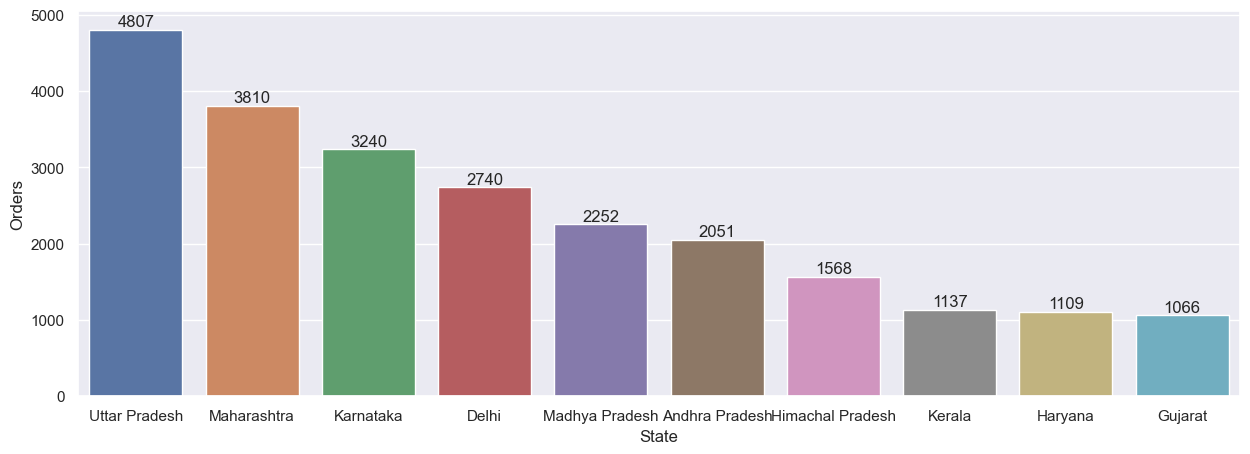

In [23]:
sns.set(rc={'figure.figsize':(15,5)})
ax= sns.barplot(data=sales_state, x = "State", y = "Orders")
for bars in ax.containers:
    ax.bar_label(bars)

In [24]:
#Totla amount/sale from top 10 states
 
sales_state = df.groupby(["State"], as_index = False)["Amount"].sum().sort_values(by= "Amount", ascending = False).head(10)
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


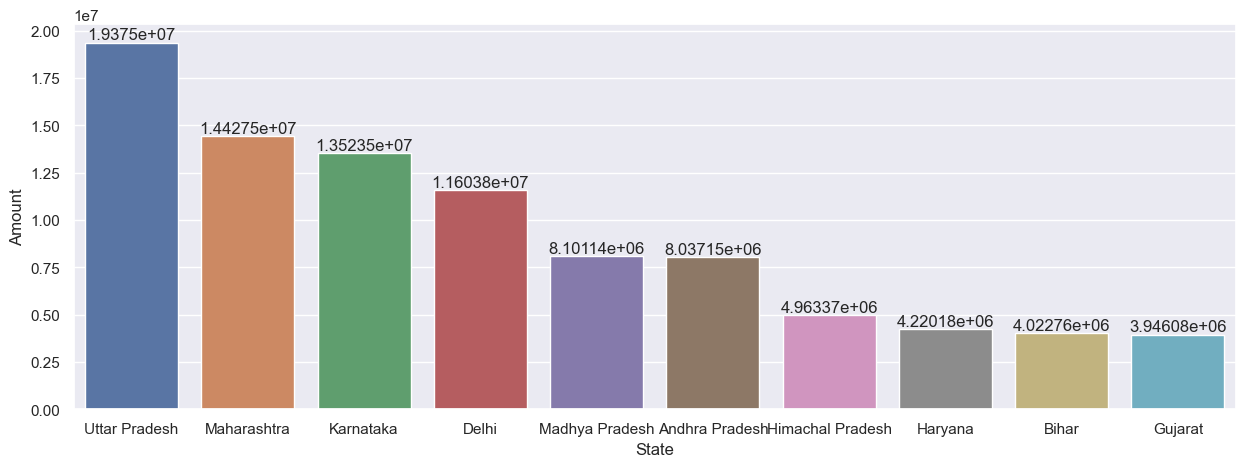

In [25]:
ax=sns.barplot(data=sales_state, x = "State", y = "Amount")
for bars in ax.containers:
    ax.bar_label(bars)

From above graphs we can see that unexpectedely most of the orders are from Utter Pradesh, Maharashtra and Karnataka respectively but total sales/amount is from UP, Karnataka and then Maharashtra

# Marital Status

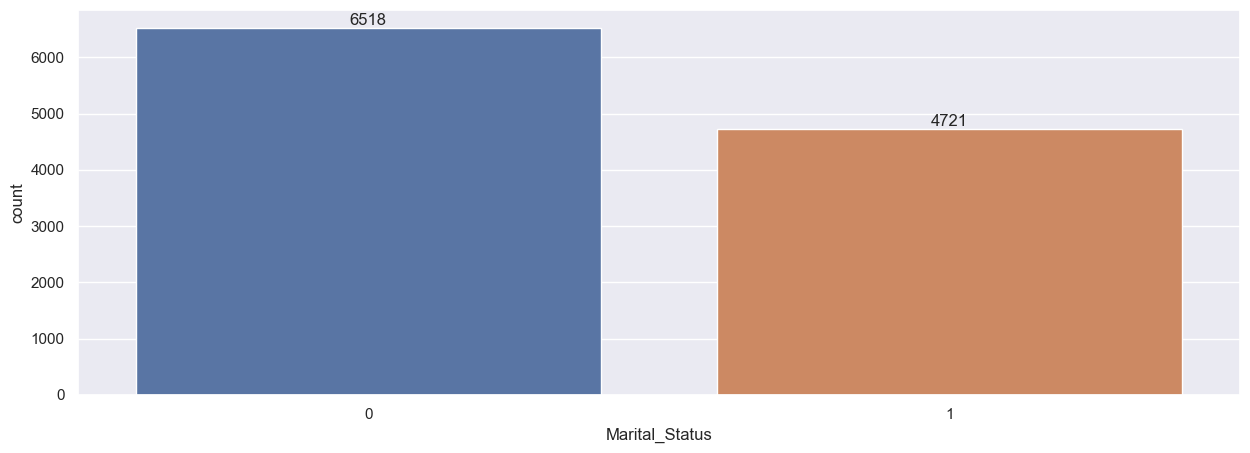

In [26]:
ax= sns.countplot(data= df, x= "Marital_Status")

sns.set(rc={'figure.figsize':(6,5)})
for bars in ax.containers:
    ax.bar_label(bars)
    

<Axes: xlabel='Marital_Status', ylabel='Amount'>

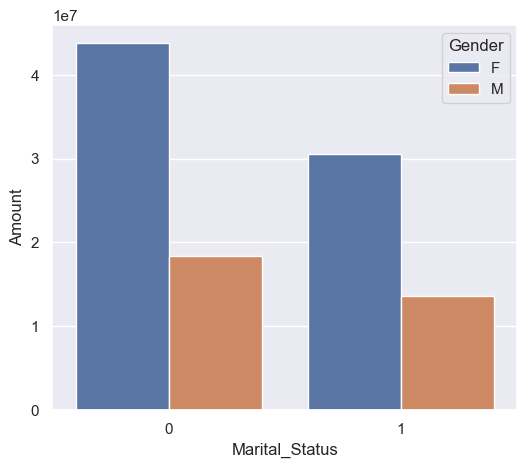

In [27]:
sales_status= df.groupby(["Marital_Status", "Gender"], as_index= False)["Amount"].sum().sort_values(by= "Amount", ascending = False)

sns.barplot(data= sales_status, x = "Marital_Status", y = "Amount", hue="Gender")

from above graphs we can see that most of the buyers are married(Female) and they have high purchasing power

# Occupation

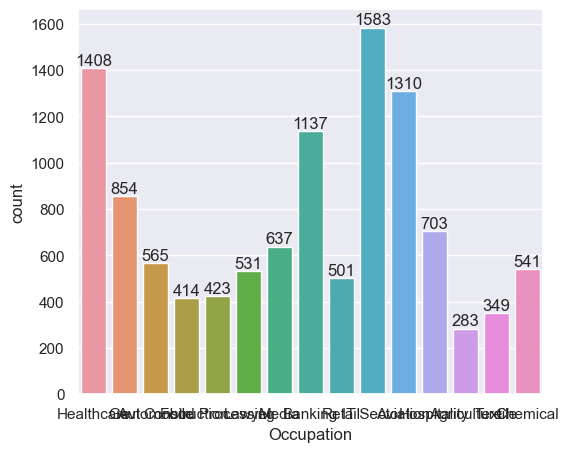

In [28]:
ax = sns.countplot(data= df, x = "Occupation")

sns.set(rc={"figure.figsize":(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

In [29]:
sales_state = df.groupby(["Occupation"], as_index = False)["Amount"].sum().sort_values(by= "Amount", ascending = False)
sales_state


,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

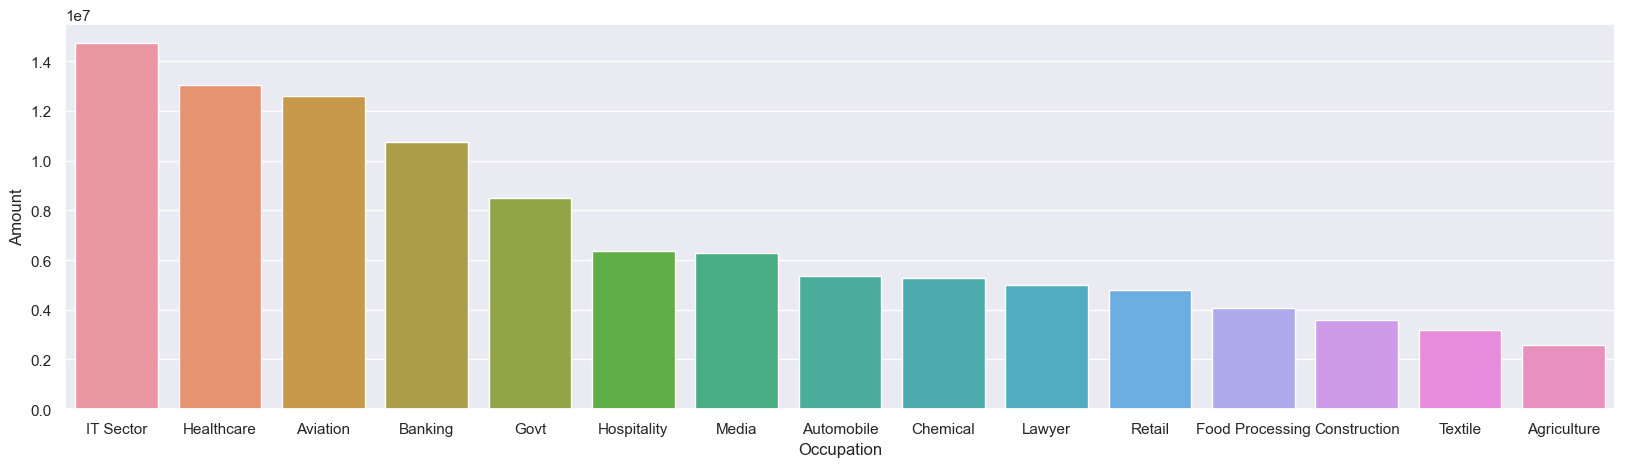

In [30]:
sns.barplot(data= sales_state, x= "Occupation", y = "Amount")

From above graphs we can say that most of the buyers are working in IT, Healthcare and aviation sector

# Product Category

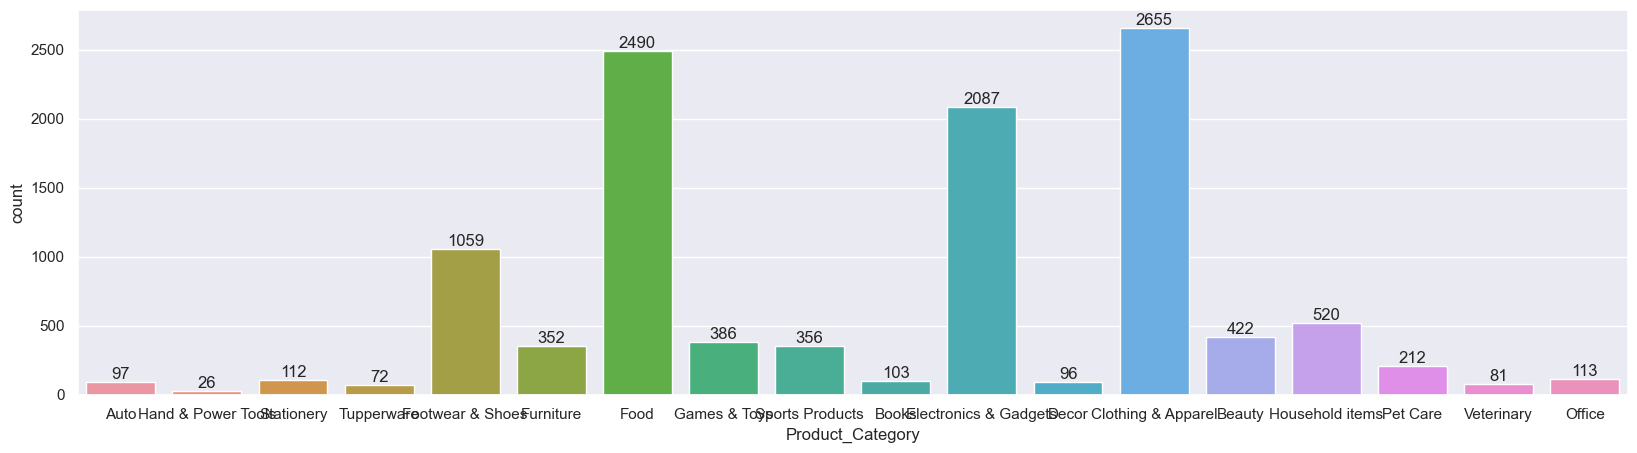

In [31]:
ax = sns.countplot(data = df, x = "Product_Category")

sns.set(rc = {"figure.figsize": (20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

In [32]:
sales_state = df.groupby(["Product_Category"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)
sales_state

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


<Axes: xlabel='Product_Category', ylabel='Amount'>

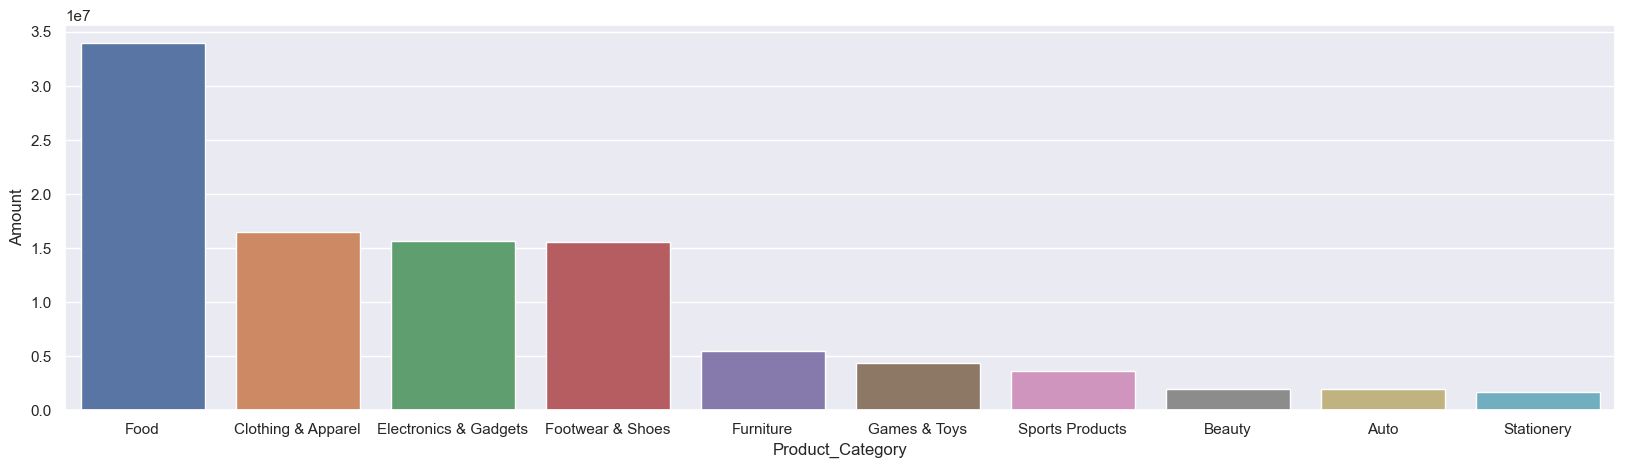

In [33]:
sns.barplot(data= sales_state, x ="Product_Category", y = "Amount")

From above graphs we can say that most of the sold products are from Food, clothing and electronic gadgets

# Top 10 selling products

In [34]:
sales_state = df.groupby(["Product_ID"], as_index= False)["Orders"].sum().sort_values(by="Orders", ascending= False).head(10)
sales_state

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


<Axes: xlabel='Product_ID', ylabel='Orders'>

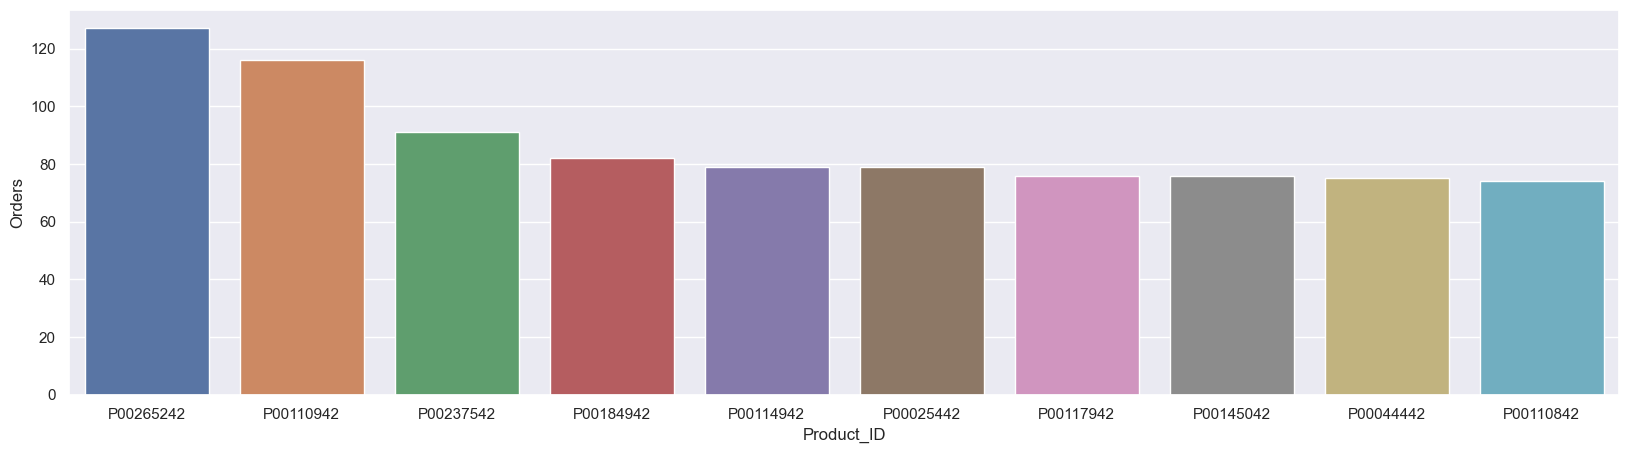

In [35]:
sns.barplot(data = sales_state, x = "Product_ID", y = "Orders")

# Conclusion:
    

Married Women age group 26-35yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely
buy products from food, clothing and electronics category